In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import random

In [99]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'])
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [100]:
sepals = data[['Sepal length', 'Sepal width']]
sepals

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [119]:
petals = data[['Petal length', 'Petal width']]
petals

,Petal length,Petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


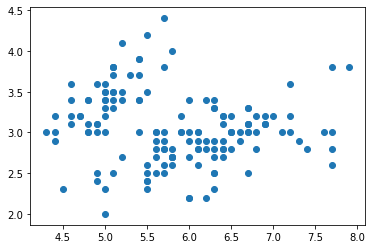

In [102]:
plt.scatter(x=sepals['Sepal length'], y=sepals['Sepal width']);

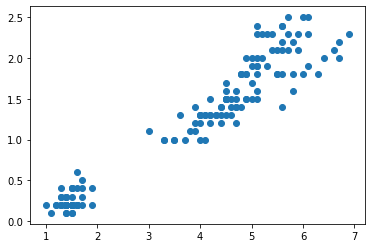

In [103]:
plt.scatter(x=petals['Petal length'], y=petals['Petal width']);

In [123]:
def k_means(data, k):
    m, n = data.shape[0], data.shape[1]
    centroids = []
    old_centroids = [list(np.zeros(n)) for i in range(k)]
    cluster = []
    
    temp = data.copy()
    for i in range(k):
        centroids.append([random.randint(int(min(data.iloc[:, 0])), int(max(data.iloc[:, 0]))), \
                          random.randint(int(min(data.iloc[:, 1])), int(max(data.iloc[:, 1])))])
    
    while np.all(centroids == old_centroids) != True:
        cluster = []

        for i in range(m):
            distance = []
            for j in range(k):
                distance.append((((data.iloc[i].values[0] - centroids[j][0])**2) + \
                                 ((data.iloc[i].values[1] - centroids[j][1])**2))**0.5)
            cluster.append(distance.index(min(distance)))
        
        old_centroids = centroids
        
        temp['Cluster'] = cluster
        
        kekayu = []
        for i in range(k):
            x = 0
            y = 0
            q = temp[temp['Cluster'] == i]
            kekayu.append([np.mean(q.iloc[:, 0]), np.mean(q.iloc[:, 1])])
        centroids = kekayu
    
    return cluster

In [124]:
cluster = k_means(petals, 2)
print(cluster)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [125]:
temp_petals = petals.copy()
temp_petals['Type'] = cluster
temp_petals

,Petal length,Petal width,Type
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [126]:
import seaborn as sns

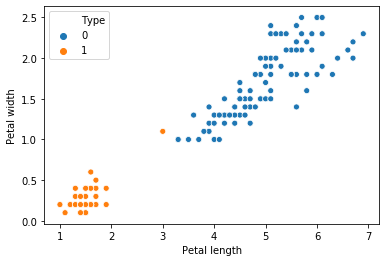

In [128]:
sns.scatterplot(x=petals['Petal length'], y=petals['Petal width'], hue=temp_petals['Type']);

In [129]:
cluster = k_means(petals, 3)

In [130]:
temp_petals = petals.copy()
temp_petals['Type'] = cluster
temp_petals

,Petal length,Petal width,Type
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


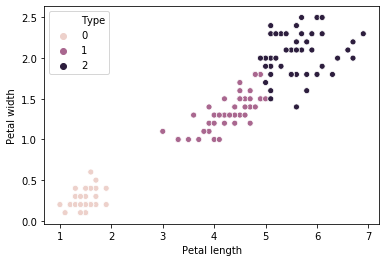

In [131]:
sns.scatterplot(x=petals['Petal length'], y=petals['Petal width'], hue=temp_petals['Type']);

In [132]:
cluster = k_means(sepals, 3)

In [133]:
temp_sepals = sepals.copy()
temp_sepals['Type'] = cluster
temp_sepals

,Sepal length,Sepal width,Type
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


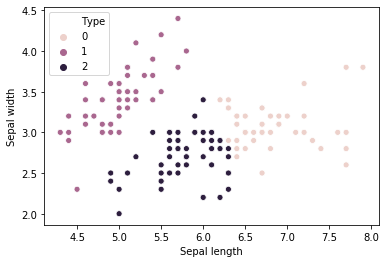

In [134]:
sns.scatterplot(x=temp_sepals['Sepal length'], y=temp_sepals['Sepal width'], hue=temp_sepals['Type']);